We sort of follow https://blog.keras.io/building-autoencoders-in-keras.html and chapter 17 of the book and use autoencoders on the fashion MNIST data. The specific network structures are prescribed in the assignment.

In [0]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist, fashion_mnist
from tensorflow.keras.layers import Dense, Flatten, Reshape
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.layers import Conv2DTranspose, UpSampling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras import regularizers
from tensorflow.keras import backend as K
# import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(42)
%matplotlib inline
# sns.set()

In [5]:
FASHION = False
if not FASHION:
    print("NOT using fashion_mnist")
    (x_train, y_train), (x_test, y_test) = mnist.load_data()
else:
    print("Using fashion_mnist")
    (x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
img_size = x_train[0].shape
x_train.shape, x_test.shape

NOT using fashion_mnist
11493376/11490434 [==============================] - 0s 0us/step


((60000, 28, 28), (10000, 28, 28))

In [0]:
def plot_image(image):
    plt.imshow(image, cmap="binary")
    plt.axis("off")


def show_reconstructions(model, n_images=10):
    # indices = np.random.permutation(len(x_test))[:n_images]
    # Pff okay the book doesn't have the best code, no ^ for now
    indices = [i for i in range(5)]
    reconstructions = model.predict(x_test[indices])
    fig = plt.figure(figsize=(n_images * 1.5, 3))
    for image_index in indices:
        plt.subplot(2, n_images, 1 + image_index)
        plot_image(x_test[image_index])
        plt.subplot(2, n_images, 1 + n_images + image_index)
        plot_image(reconstructions[image_index])


def fit_and_show(model, x_train1=x_train, epochs=24+12*FASHION):
    model.compile(loss="binary_crossentropy", optimizer="adam")
    history = model.fit(
        x_train1, x_train, epochs=epochs, validation_split=.05, 
        shuffle=True, use_multiprocessing=False, batch_size=24)
    show_reconstructions(model)

In [0]:
# 1. A simple autoencoder (784:32:784).
# As in the book, which is a bit less intuitive than on the blog.

stacked_encoder = Sequential([
    Flatten(input_shape=img_size),
    Dense(32, activation="selu"),
])
stacked_decoder = Sequential([
    Dense(np.prod(img_size), activation="sigmoid", input_shape=[32]),
    Reshape(img_size)
])

stacked_ae = Sequential([stacked_encoder, stacked_decoder])

fit_and_show(stacked_ae)

Epoch 1/24
2375/2375 [==============================] - 4s 2ms/step - loss: 0.1695 - val_loss: 0.1373
Epoch 2/24
2375/2375 [==============================] - 4s 2ms/step - loss: 0.1330 - val_loss: 0.1305
Epoch 3/24
2375/2375 [==============================] - 4s 2ms/step - loss: 0.1245 - val_loss: 0.1203
Epoch 4/24
2375/2375 [==============================] - 4s 2ms/step - loss: 0.1152 - val_loss: 0.1138
Epoch 5/24
2375/2375 [==============================] - 4s 2ms/step - loss: 0.1107 - val_loss: 0.1104
Epoch 6/24
2375/2375 [==============================] - 4s 2ms/step - loss: 0.1068 - val_loss: 0.1066
Epoch 7/24
2375/2375 [==============================] - 4s 2ms/step - loss: 0.1037 - val_loss: 0.1046
Epoch 8/24
2375/2375 [==============================] - 4s 2ms/step - loss: 0.1021 - val_loss: 0.1035
Epoch 9/24
2375/2375 [==============================] - 4s 2ms/step - loss: 0.1011 - val_loss: 0.1027
Epoch 10/24
2375/2375 [==============================] - 4s 2ms/step - loss: 0.100

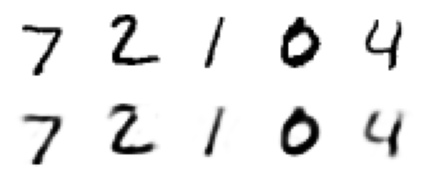

In [7]:
# 2. A simple sparse autoencoder (also 784:32:784).

stacked_encoder = Sequential([
    Flatten(input_shape=img_size),
    Dense(32, activation="selu", activity_regularizer=regularizers.l1(10e-5)),
])
stacked_decoder = Sequential([
    Dense(np.prod(img_size), activation="sigmoid", input_shape=[32]),
    Reshape(img_size)
])

stacked_ae = Sequential([stacked_encoder, stacked_decoder])

fit_and_show(stacked_ae)

In [0]:
# 3. A simple deep autoencoder (784:128:64:32:64:128:784). 
# (It's not specified so let's make it symmetric.)

stacked_encoder = Sequential([
    Flatten(input_shape=img_size),
    Dense(128, activation="selu"),
    Dense(64, activation="selu"),
    Dense(32, activation="selu"),
])
stacked_decoder = Sequential([
    Dense(64, activation="selu", input_shape=[32]),
    Dense(128, activation="selu"),
    Dense(np.prod(img_size), activation="sigmoid"),
    Reshape(img_size)
])

stacked_ae = Sequential([stacked_encoder, stacked_decoder])

fit_and_show(stacked_ae)

Epoch 1/12
2375/2375 [==============================] - 8s 3ms/step - loss: 0.1344 - val_loss: 0.1066
Epoch 2/12
2375/2375 [==============================] - 7s 3ms/step - loss: 0.0999 - val_loss: 0.0981
Epoch 3/12
2375/2375 [==============================] - 7s 3ms/step - loss: 0.0938 - val_loss: 0.0932
Epoch 4/12
2375/2375 [==============================] - 7s 3ms/step - loss: 0.0903 - val_loss: 0.0908
Epoch 5/12
2375/2375 [==============================] - 8s 3ms/step - loss: 0.0884 - val_loss: 0.0896
Epoch 6/12
2375/2375 [==============================] - 8s 3ms/step - loss: 0.0871 - val_loss: 0.0881
Epoch 7/12
2375/2375 [==============================] - 8s 3ms/step - loss: 0.0863 - val_loss: 0.0875
Epoch 8/12
2375/2375 [==============================] - 7s 3ms/step - loss: 0.0856 - val_loss: 0.0873
Epoch 9/12
2375/2375 [==============================] - 8s 3ms/step - loss: 0.0851 - val_loss: 0.0868
Epoch 10/12
2375/2375 [==============================] - 8s 3ms/step - loss: 0.084

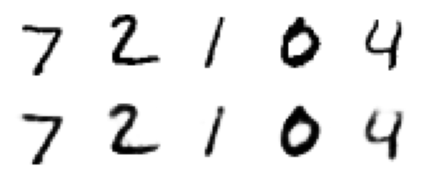

In [0]:
# 3-2. A simple deep autoencoder (784:128:64:32:64:128:784).
# This time with the weight tying from the book.


class DenseTranspose(tf.keras.layers.Layer):
    def __init__(self, dense, activation=None, **kwargs):
        self.dense = dense
        self.activation = tf.keras.activations.get(activation)
        super().__init__(**kwargs)

    def build(self, batch_input_shape):
        self.biases = self.add_weight(name="bias", initializer="zeros",
                                      shape=[self.dense.input_shape[-1]])
        super().build(batch_input_shape)

    def call(self, inputs):
        z = tf.matmul(inputs, self.dense.weights[0], transpose_b=True)
        return self.activation(z + self.biases)


dense_1 = Dense(128, activation="selu")
dense_2 = Dense(64, activation="selu")
dense_3 = Dense(32, activation="selu")
stacked_encoder = Sequential([
    Flatten(input_shape=img_size),
    dense_1,
    dense_2,
    dense_3,
])
stacked_decoder = Sequential([
    DenseTranspose(dense_3, activation="selu"),
    DenseTranspose(dense_2, activation="selu"),
    DenseTranspose(dense_1, activation="sigmoid"),
    Reshape(img_size)
])

stacked_ae = Sequential([stacked_encoder, stacked_decoder])

fit_and_show(stacked_ae)

Epoch 1/2
2375/2375 [==============================] - 18s 8ms/step - loss: 0.1032 - val_loss: 0.0847
Epoch 2/2
2375/2375 [==============================] - 18s 8ms/step - loss: 0.0790 - val_loss: 0.0790


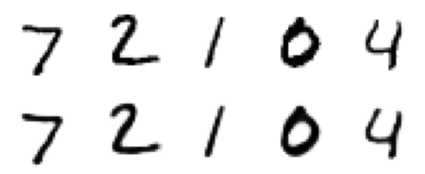

In [0]:
# 4. A convolutional autoencoder
#    (encoder: 3 convolutional layers; each followed by MaxPooling;
#     decoder: symmetric deconvolutions; each followed by UpSampling).

n1 = 16; n2 = 32; n3= 64

if False:
    # As in book, without explicit UpSampling (so do look below).
    conv_encoder = Sequential([
        Reshape([*img_size, 1], input_shape=img_size),
        Conv2D(n1, (3, 3), activation="selu", padding="same"),
        MaxPool2D(padding='same'),
        Conv2D(n2, (3, 3), activation="selu", padding="same"),
        MaxPool2D(padding='same'),
        Conv2D(n3, (3, 3), activation="selu", padding="same"),
        MaxPool2D(padding='same')
    ])
    conv_decoder = Sequential([
        Conv2DTranspose(n2, (3, 3), strides=(2, 2), activation="selu", 
                        padding="valid", input_shape=[3, 3, 64]),
        Conv2DTranspose(n1, (3, 3), strides=(2, 2), activation="selu", 
                        padding="same"),
        Conv2DTranspose(1, (3, 3), strides=(2, 2), activation="sigmoid", 
                        padding="same"),
        Reshape(img_size)
    ])
    conv_ae = Sequential([conv_encoder, conv_decoder])
else:
    # As on blog, also with explicit UpSampling.
    input_img = tf.keras.layers.Input(shape=(*img_size, 1))

    x = Conv2D(n1, (3, 3), activation='relu', padding='same')(input_img)
    x = MaxPool2D((2, 2), padding='same')(x)
    x = Conv2D(n2, (3, 3), activation='relu', padding='same')(x)
    x = MaxPool2D((2, 2), padding='same')(x)
    x = Conv2D(n3, (3, 3), activation='relu', padding='same')(x)
    encoded = MaxPool2D((2, 2), padding='same')(x)

    x = Conv2D(n3, (3, 3), activation='relu', padding='same')(encoded)
    x = UpSampling2D((2, 2))(x)
    x = Conv2D(n2, (3, 3), activation='relu', padding='same')(x)
    x = UpSampling2D((2, 2))(x)
    x = Conv2D(n1, (3, 3), activation='relu')(x)
    x = UpSampling2D((2, 2))(x)
    decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)
    decoded = Reshape(img_size)(decoded)

    conv_ae = tf.keras.models.Model(input_img, decoded)

fit_and_show(conv_ae)

In [0]:
# 5. An application of convolutional autoencoder to image denoising.

noise_factor = 0.42
x_train_noisy = x_train + noise_factor * np.random.normal(size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(size=x_test.shape) 
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

n = 8
plt.figure(figsize=(16, 2))
for i in range(n):  
    ax = plt.subplot(1, n, i + 1)  # the blog is worse; wasn't even correct :D
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

fit_and_show(conv_ae, x_train1=x_train_noisy)

Epoch 1/18
2375/2375 [==============================] - 10s 4ms/step - loss: 0.3663 - val_loss: 0.3506
Epoch 2/18
2375/2375 [==============================] - 10s 4ms/step - loss: 0.3479 - val_loss: 0.3466
Epoch 3/18
2375/2375 [==============================] - 10s 4ms/step - loss: 0.3441 - val_loss: 0.3448
Epoch 4/18
2375/2375 [==============================] - 10s 4ms/step - loss: 0.3418 - val_loss: 0.3415
Epoch 5/18
2375/2375 [==============================] - 10s 4ms/step - loss: 0.3400 - val_loss: 0.3412
Epoch 6/18
2375/2375 [==============================] - 10s 4ms/step - loss: 0.3385 - val_loss: 0.3422
Epoch 7/18
2375/2375 [==============================] - 10s 4ms/step - loss: 0.3375 - val_loss: 0.3389
Epoch 8/18
2375/2375 [==============================] - 10s 4ms/step - loss: 0.3368 - val_loss: 0.3369
Epoch 9/18
2375/2375 [==============================] - 10s 4ms/step - loss: 0.3361 - val_loss: 0.3381
Epoch 10/18
2375/2375 [==============================] - 10s 4ms/step - l

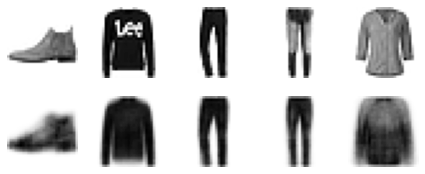

In [0]:
# 6. A variational AE and its application for 2-d visualization of 10 classes 
#    of images and VAE as a generative model for 10 classes of images.
# Even the book uses the functional TF API.

class Sampling(tf.keras.layers.Layer):
    def call(self, inputs):
        mean, log_var = inputs
        return K.random_normal(tf.shape(log_var)) * K.exp(log_var / 2) + mean

codings_size = 2
inputs = tf.keras.layers.Input(shape=img_size)
z = Flatten()(inputs)
z = Dense(150, activation="selu")(z)
z = Dense(100, activation="selu")(z)
codings_mean = Dense(codings_size)(z)
codings_log_var = Dense(codings_size)(z)
codings = Sampling()([codings_mean, codings_log_var])
variational_encoder = tf.keras.Model(
    inputs=[inputs], outputs=[codings_mean, codings_log_var, codings])

decoder_inputs = tf.keras.layers.Input(shape=[codings_size])
x = Dense(100, activation="selu")(decoder_inputs)
x = Dense(150, activation="selu")(x)
x = Dense(np.prod(img_size), activation="sigmoid")(x)
outputs = Reshape(img_size)(x)

variational_decoder = tf.keras.Model(inputs=[decoder_inputs], outputs=[outputs])

_, _, codings = variational_encoder(inputs)
reconstructions = variational_decoder(codings)
variational_ae = tf.keras.Model(inputs=[inputs], outputs=[reconstructions])

latent_loss = -0.5 * K.sum(
    1 + codings_log_var - K.exp(codings_log_var) - K.square(codings_mean), 
    axis=-1)
variational_ae.add_loss(K.mean(latent_loss) / np.prod(img_size))

fit_and_show(variational_ae)

(3, 10000, 2)


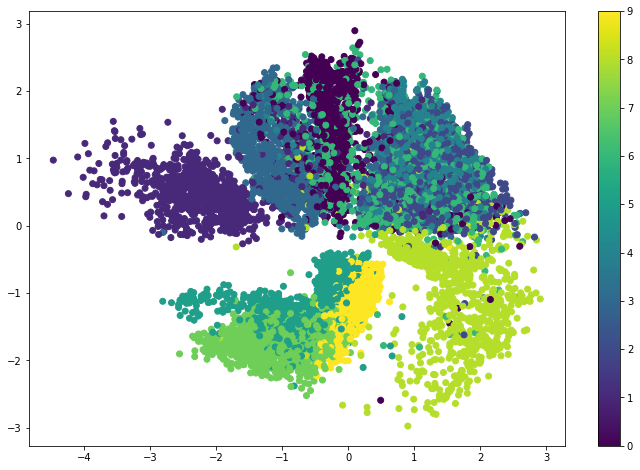

In [0]:
# This is the 2D visualization of the 10 classes.
x_test_encoded = np.array(variational_encoder.predict(x_test))
print(x_test_encoded.shape) # mean is first dimension
plt.figure(figsize=(12, 8))
plt.scatter(x_test_encoded[0, :, 0], x_test_encoded[0, :, 1], c=y_test)
plt.colorbar()
plt.show()

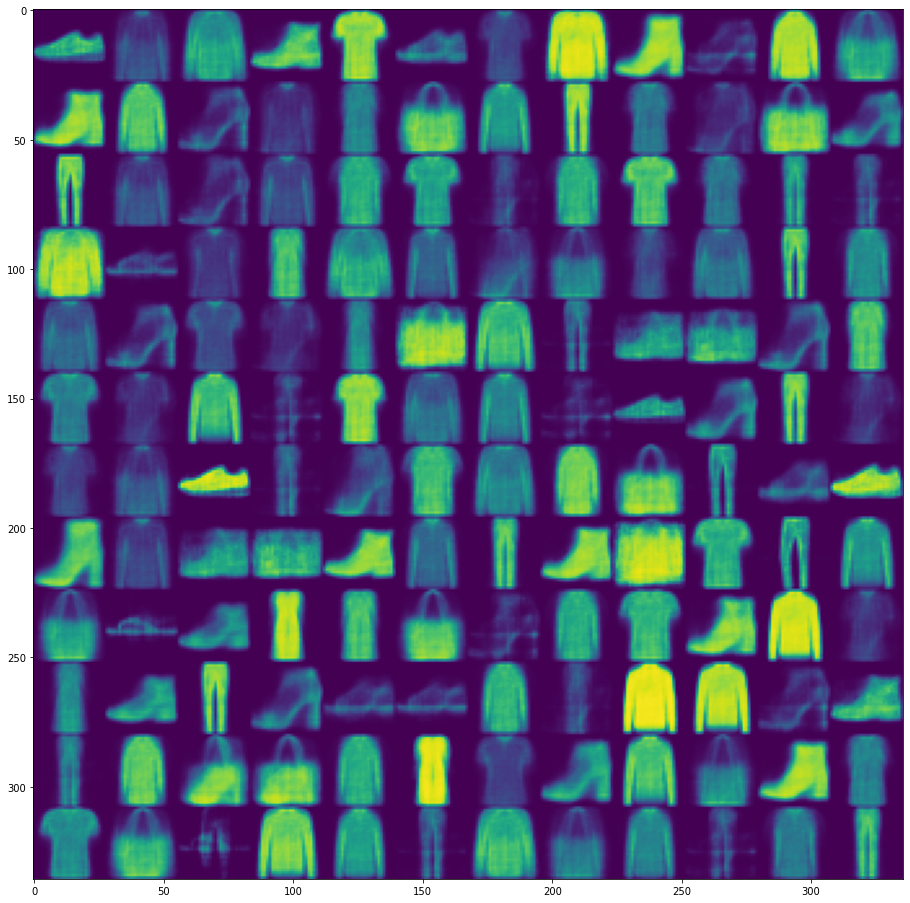

In [0]:
# This is the VAE as generative model.

n = 12
codings = np.random.normal(size=[n * n, codings_size])
x_decoded = variational_decoder.predict(codings)
digit_size = img_size[0]
figure = np.zeros((digit_size * n, digit_size * n))

for i in range(n):
    for j in range(n):
        digit = x_decoded[i + n * j]
        figure[i * digit_size: (i + 1) * digit_size,
               j * digit_size: (j + 1) * digit_size] = digit

plt.figure(figsize=(16, 16))
plt.imshow(figure)
plt.show()

In [0]:
# 7. Once you are finished with the MNIST data, 
#    rerun your notebook on the Fashion MNIST.

if not FASHION:
    print("Just set FASHION = True in the data loading cell and re-run w/e.")
else:
    print("Done!")